# Лабораторная работа №2
# Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины

## Выполнил: Щелоков Владислав Сергеевич

## Задание

1.	Найти на сайте РосСтат https://rosstat.gov.ru/statistic непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.
2.	Посчитать в распределение близком к нормальному 1 л.р. и найденном непрерывном распределении:
    - мат.ожидание (*)
    - 2 (дисперсию) (**), 3 (асимметрию) и 4 (эксцесс) моменты
    - квантили уровня 0,05 и 0,95; 2,5%-ную точку для найденной случайной величины.
3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

### Загрузка данных

Для анализа был выбран [датасет](https://www.kaggle.com/datasets/ziya07/student-health-data), содержащий физическое и физиологическое состояние студентов, направленный на оценку риска для здоровья людей в условиях, подобных академической среде

In [2]:
!kaggle datasets download --unzip -d ziya07/student-health-data -p ../datasets/

Dataset URL: https://www.kaggle.com/datasets/ziya07/student-health-data


  0%|          | 0.00/70.8k [00:00<?, ?B/s]
100%|██████████| 70.8k/70.8k [00:00<00:00, 714kB/s]
100%|██████████| 70.8k/70.8k [00:00<00:00, 707kB/s]



License(s): CC0-1.0



In [3]:
df = pd.read_csv(r'../datasets/student_health_data.csv')

In [4]:
df.sample(5, random_state=34)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
430,431,22,M,67.395014,138.984443,95.351487,9.039740,2.933691,Moderate,Good,Neutral,43.040665,14.899039,Moderate
972,973,24,M,61.056674,102.234597,77.793572,3.128274,7.592092,Low,Good,Neutral,25.050098,18.320265,Moderate
395,396,23,M,74.535378,122.256082,60.000000,8.720720,6.503454,Moderate,Moderate,Happy,29.676472,26.409515,Moderate
310,311,24,F,77.214663,145.072243,60.678328,9.418550,9.962221,High,Good,Neutral,28.275040,10.879333,High
130,131,20,M,74.599290,137.909344,81.228434,4.060039,9.303152,Moderate,Good,Neutral,24.508092,13.501736,Moderate


In [5]:
# Пропусков в данных не наблюдается
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [6]:
pressure_data = df.Blood_Pressure_Systolic

### Построение гистограммы распределения

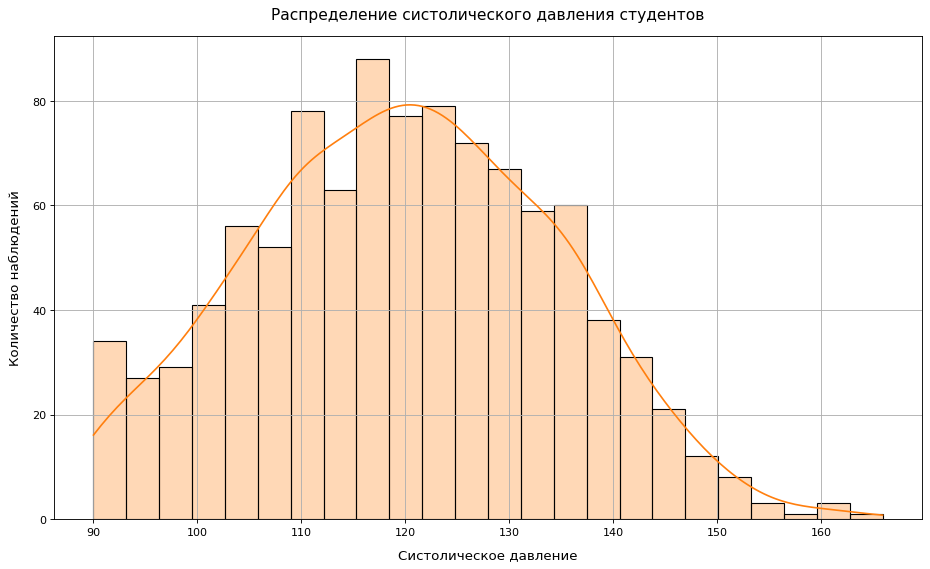

In [7]:
plt.figure(figsize=(14, 8), dpi=80)

sns.histplot(pressure_data, bins=24, kde=True, color='tab:orange', alpha=0.3, stat='count')
plt.title('Распределение систолического давления студентов', fontsize=14, pad=15)
plt.xlabel('Систолическое давление', fontsize=12, labelpad=10)
plt.ylabel('Количество наблюдений', fontsize=12, labelpad=10)
plt.grid()
plt.show()

### Вычисление значений описательных статистик

In [8]:
pressure_stats = pressure_data[[]] # pd.Series(name=pressure_data.name)

# Математическое ожидание
mean = pressure_data.mean()

# Дисперсия. Поправка смещенности оценки параметра: n/(n-1)
variance = pressure_data.var(ddof=1)

# Асимметрия. Поправка смещенности оценки параметра: sqrt(n*(n-1)) / (n-2)
skewness = stats.skew(pressure_data, bias=False, nan_policy='omit')

# Эксцесс. Несмещенная оценка параметра: (μ₄(n+1)-3(n-1)) * (n-1) / ((n-2)*(n-3))
kurtosis = stats.kurtosis(pressure_data, fisher=True, bias=False, nan_policy='omit')


# Квантили уровня 0.05 и 0.95
quantile_05 = pressure_data.quantile(0.05)
quantile_95 = pressure_data.quantile(0.95)

# 2.5%-ная точка
quantile_975 = np.percentile(pressure_data.dropna(), 100-2.5)

### Вывод статистик

In [9]:
pressure_stats['mean'] = mean
pressure_stats['variance'] = variance
pressure_stats['skewness'] = skewness
pressure_stats['kurtosis'] = kurtosis

pressure_stats['quantile 0.05'] = quantile_05
pressure_stats['quantile 0.95'] = quantile_95
pressure_stats['top 2.5 percent'] = quantile_975

pressure_stats_fmt = pressure_stats.apply(lambda stat: '{:.4f}'.format(stat))

display(pd.DataFrame(pressure_stats_fmt))

,Blood_Pressure_Systolic
mean,119.8354
variance,213.2858
skewness,0.0634
kurtosis,-0.4560
quantile 0.05,95.3865
quantile 0.95,143.5962
top 2.5 percent,147.2886


### Сравнительная диаграмма

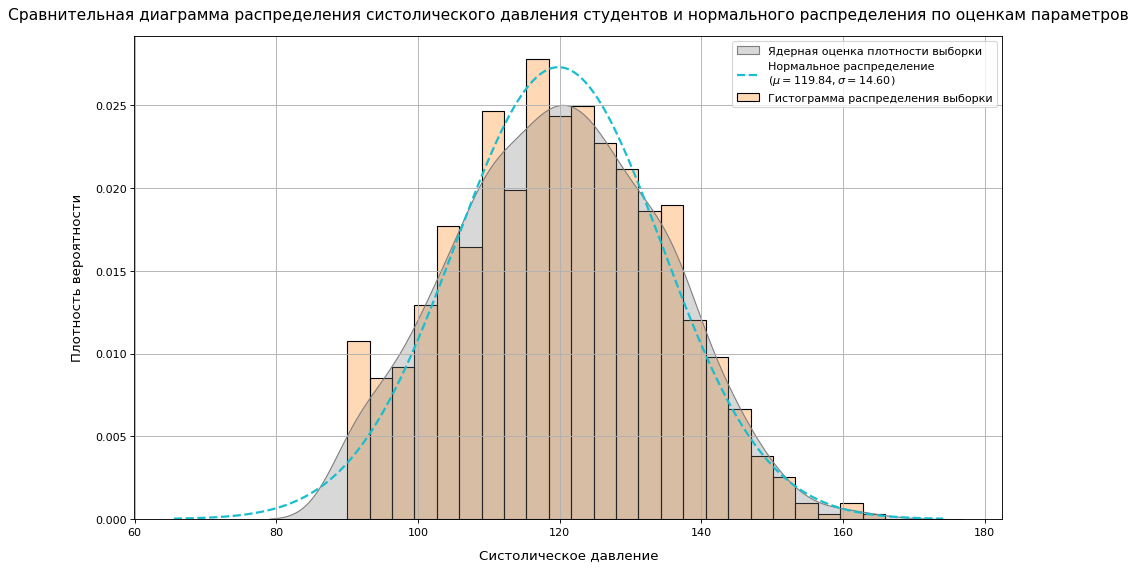

In [10]:
n_draw_points = 1000

plt.figure(figsize=(14, 8), dpi=80)

# Эмпирическое распределение
sns.histplot(pressure_data, bins=24, alpha=0.3, color='tab:orange', stat='density', label='Гистограмма распределения выборки')
sns.kdeplot(pressure_data, alpha=0.3, color='tab:grey', label='Ядерная оценка плотности выборки', fill=True)

# Нормальное распределение
x_min, x_max = stats.norm.ppf([0.0001,0.9999], loc=mean, scale=np.sqrt(variance))
x_draw = np.linspace(x_min, x_max, n_draw_points)
y_normal_dist = stats.norm.pdf(x_draw, mean, np.sqrt(variance))

plt.plot(x_draw, y_normal_dist, '--', color='tab:cyan', label=f'Нормальное распределение \n($\mu={mean:.2f},\sigma={np.sqrt(variance):.2f}$)', linewidth=2)

plt.title('Сравнительная диаграмма распределения систолического давления студентов и нормального распределения по оценкам параметров', fontsize=14, pad=15)
plt.xlabel('Систолическое давление', fontsize=12, labelpad=10)
plt.ylabel('Плотность вероятности', fontsize=12, labelpad=10)
plt.legend()
plt.grid()
plt.show()

### Сравнение показало, что полученное нормальное распределение близко к распределению выборки систолического давления у студентов